In [388]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings if any
#Importing library for pre-processing
from sklearn.preprocessing import MinMaxScaler
#Imporing statsmodels api  to get stastics of a model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [389]:
#Read the data file
bike = pd.read_csv("day.csv")

In [390]:
#Observe first 5 samples of data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [391]:
# Total 730 rows and 16 columns
bike.shape

(730, 16)

In [392]:
# We can observe that non of the columns has NULL value
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [393]:
# Check mean, median, mode, min and max of all numerical data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [394]:
#See all the columns list in data set
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data Cleaning

In [395]:
# we can observe that instant column is not useful for our analysis, as it's just an index column
# We can drop indtant column
bike = bike.drop("instant",axis=1)

#We can drop dteday as well, as we already have day, mnth and yr columns in data set
bike = bike.drop("dteday",axis=1)

# We can drop casual,registered as well, beacuse we are considering all bike booking. So cnt is enough
bike = bike.drop(["casual","registered"],axis=1)

In [396]:
#Check columns list, after dropping not required columns
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [397]:
# We can devide columns in two sections 
#1. Numeric values
#2. Categorical
numeric = ['temp', 'atemp', 'hum', 'windspeed',"cnt"]
cat = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

# Exploratory Data Analysis
* Numerical
* Categorical


# Numerical analysis

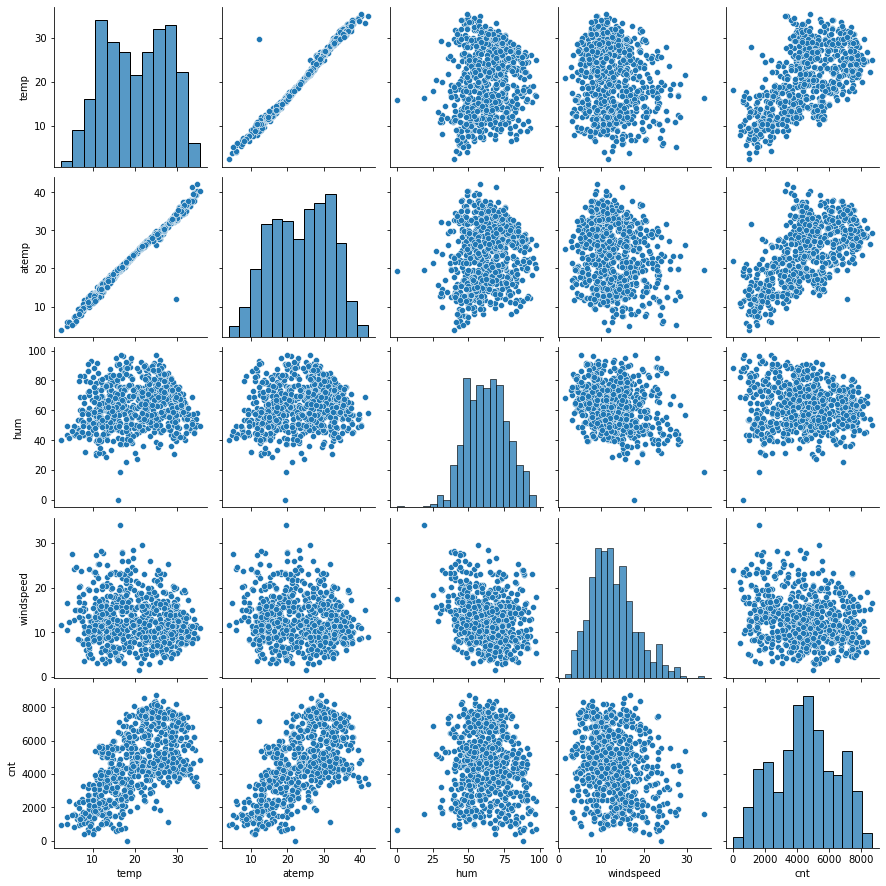

In [398]:
#Pair plot between numerical columns
sns.pairplot(bike[numeric])
plt.show()

In [399]:
# We can observer that some independent variables are related to count of rented bike.

# temp ,cnt and atemp follow linear relationship.

# Assumption 1: 
<b>Linearity</b> between dependent and in-dependent feature :

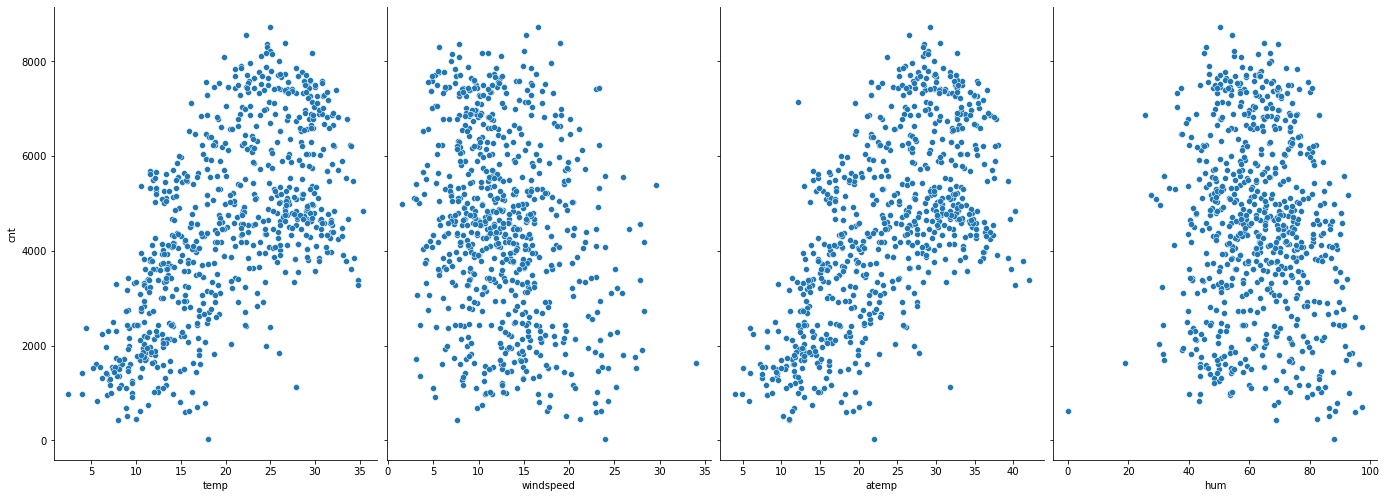

In [400]:
sns.pairplot(bike, x_vars=['temp','windspeed','atemp',"hum"], y_vars='cnt', size=7, aspect=0.7)
plt.show()

In [401]:
#Clearly observed that temp and temp are positively linear related to cnt 
#and windspeed and hum ae negatively related.

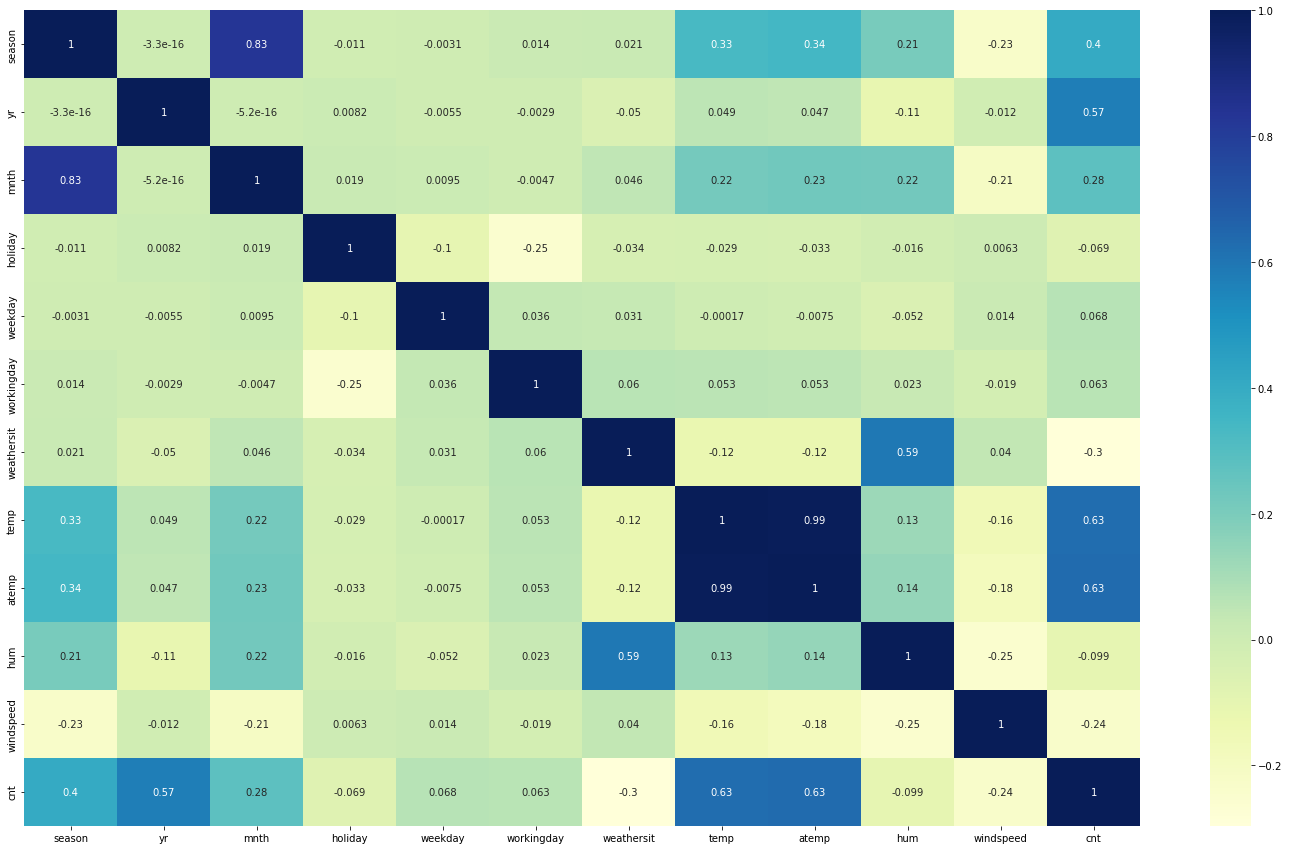

In [402]:
#Correlation between features
plt.figure(figsize=(25,15))
sns.heatmap(bike.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Observations:
* Season, temp, atemp, yr are  positively corelated with count.
* Windspeed, hum,weathersit, holiday are negatively corelated with cnt.

# Categorical analysis

In [403]:
#Total 7 categorical variables
cat = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

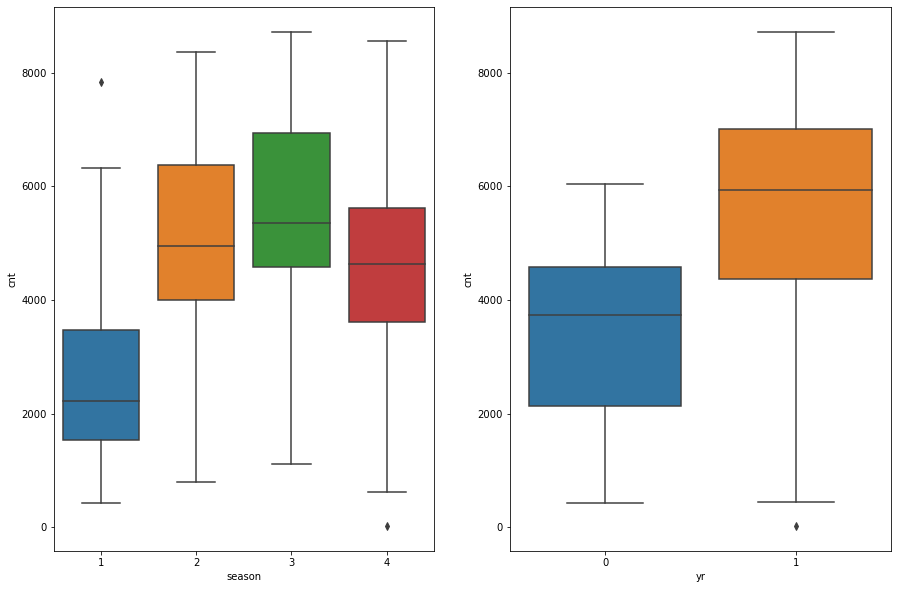

In [404]:
# Observe season and yr
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="season",y="cnt",data=bike)

plt.subplot(1,2,2)
sns.boxplot(x="yr",y="cnt",data=bike)

plt.show()

# Observation:
#  Season :
*  We can observe that biking count increasing from 1,2 3 season and decreasing in 4th season because of winter
* Maximum biking occurs in 3rd season
# year :
* Demand of rented bikes increased in 2019 as compared to 2018

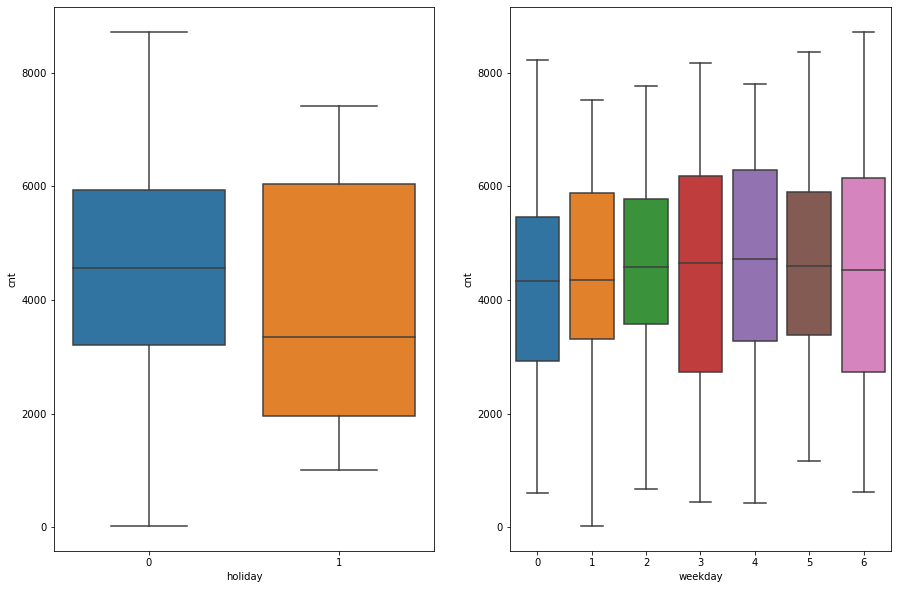

In [405]:
#Observe holiday and weekday
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="holiday",y="cnt",data=bike)

plt.subplot(1,2,2)
sns.boxplot(x="weekday",y="cnt",data=bike)

plt.show()

# Observation 
# holiday :
* Median of bike rented on holiday is more as compared to not a holiday

# weekday 
* All most same/constant number of bookings on weekdays. Very close trends of bike booking

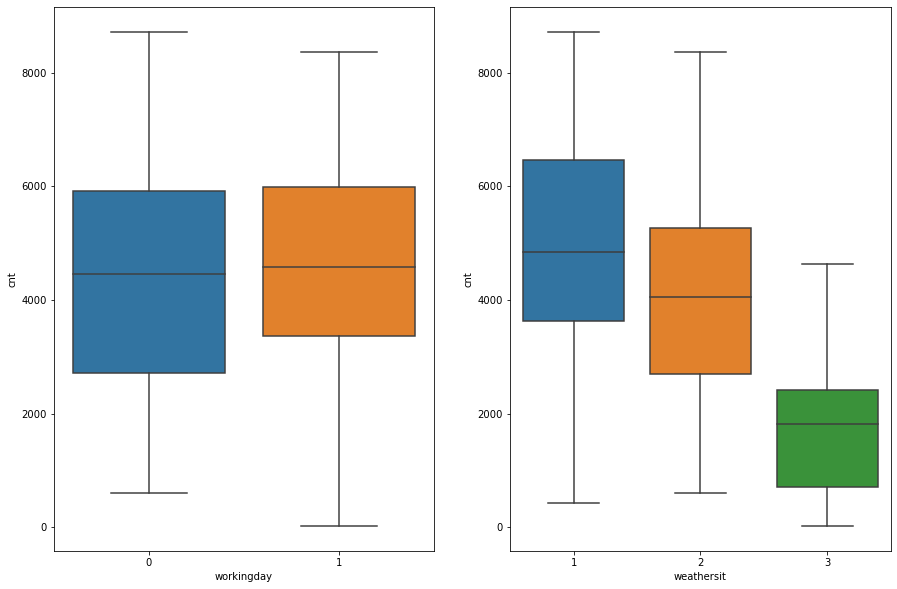

In [406]:
#Observe workingday and weathersit
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="workingday",y="cnt",data=bike)

plt.subplot(1,2,2)
sns.boxplot(x="weathersit",y="cnt",data=bike)

plt.show()

# Observations:
# workingday:
* Median of rented bike booking is same on working and non working day

# weatherlist VS cnt
* Maximum number of bike booking in 1st ewather
* We can see an decrease in booking of rented bike as weather changes from clear to mist to light snow

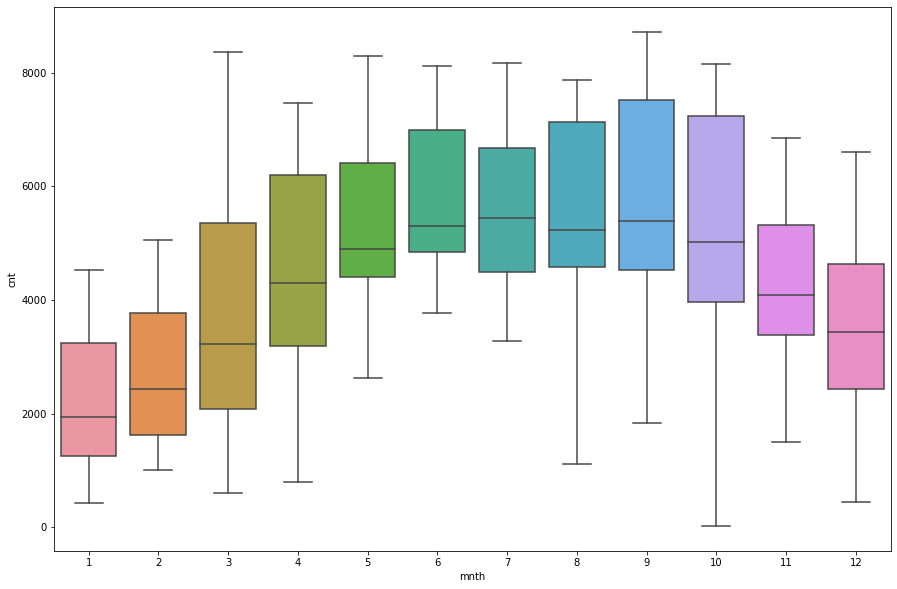

In [407]:
#Observing mnth column
plt.figure(figsize=(15,10))
sns.boxplot(x="mnth",y="cnt",data=bike)
plt.show()

# Observation:
* An increase in booking of rented bike till 7th month and the it's start falling.

# Preparing Data for modelling
# Encoding : One-hot encoding

* Convert categorical to dummy vars

# One Hot encoding for : 'season' 

In [408]:
def func(x):
    switcher = {
        1: "spring",
        2: "summer",
        3: "fall",
        4: "winter"
    }
    return switcher.get(x)
    

In [409]:
bike["season"] = bike["season"].apply(lambda x: func(x))

In [410]:
# See all available seasons and their counts
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [411]:
#Creating dummies for season category
season = pd.get_dummies(bike["season"])

In [412]:
#Observe random 10 sample entries of data set
season.sample(10)

,fall,spring,summer,winter
376,0,1,0,0
718,0,0,0,1
87,0,0,1,0
298,0,0,0,1
712,0,0,0,1
614,1,0,0,0
363,0,1,0,0
135,0,0,1,0
329,0,0,0,1
362,0,1,0,0


In [413]:
# We don't need 4 columns to represent all sesaons. We can use 3 columns
# we can drop (First column) fall column and identify with just three dummy columns:

# 000 -> fall
# 001 -> winter
# 010 -> summer
# 100 -> spring

In [414]:
#Dropping first column
season = pd.get_dummies(bike["season"],drop_first=True)

In [415]:
#Observe random 10 sample entries of data set, after dropping
season.sample(10)

,spring,summer,winter
274,0,0,1
6,1,0,0
485,0,1,0
124,0,1,0
110,0,1,0
429,1,0,0
700,0,0,1
712,0,0,1
562,0,0,0
384,1,0,0


In [416]:
# concatenate the above data frame, with actual data set
bike = pd.concat([bike,season],axis=1)

In [417]:
##Observe first 5 sample of data set
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [418]:
#Dropping extra/redundant season column from data set
bike = bike.drop("season",axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


# One Hot encoding for : 'weekday' 

In [419]:
def func_weeday(n):
    switcher ={
        0:"Sun",
        1:"Mon",
        2:"Tue",
        3:"Wed",
        4:"Thu",
        5:"Fri",
        6:"Sat"
    }
    return switcher.get(n)

In [420]:
bike["weekday"] = bike["weekday"].apply(lambda x: func_weeday(x) )

In [421]:
#Creating dummies for weekday category
weekday = pd.get_dummies(bike["weekday"])

In [422]:
weekday.sample(10)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
396,0,0,0,0,0,0,1
175,0,0,1,0,0,0,0
194,0,0,0,0,1,0,0
282,0,1,0,0,0,0,0
683,0,0,0,0,1,0,0
587,0,0,1,0,0,0,0
548,0,0,0,0,0,1,0
610,0,1,0,0,0,0,0
594,0,0,1,0,0,0,0
474,1,0,0,0,0,0,0


In [423]:
# We don't need 7 columns to represent all weedays. We can use 6 columns
#we can drop (First column) Fri column and identify with just six dummy columns:

# 000000 -> Fri
# 100000 -> Mon
# 010000 -> Sat
# 001000 -> Sun
# 000100 -> Thu
# 000010 -> Tue
# 000001 -> Wed

In [424]:
weekday = pd.get_dummies(bike["weekday"],drop_first=True)
weekday.sample(10)

,Mon,Sat,Sun,Thu,Tue,Wed
666,1,0,0,0,0,0
107,1,0,0,0,0,0
539,0,0,1,0,0,0
545,0,1,0,0,0,0
561,1,0,0,0,0,0
113,0,0,1,0,0,0
224,0,1,0,0,0,0
494,0,0,0,1,0,0
413,0,1,0,0,0,0
284,0,0,0,0,0,1


In [425]:
# concatenate the above two data frame
bike = pd.concat([bike,weekday],axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0
1,0,1,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0
2,0,1,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0
3,0,1,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0
4,0,1,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1


In [426]:
# Dropping extra column weekday
bike= bike.drop("weekday",axis=1)
bike.sample(10)

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
380,1,1,1,0,1,7.790000,9.53315,52.2500,15.500986,2298,1,0,0,1,0,0,0,0,0
141,0,5,0,0,1,24.770847,28.72500,74.9583,9.916536,4660,0,1,0,0,0,1,0,0,0
353,0,12,0,1,2,15.819153,19.82270,59.5417,4.125244,3750,0,0,1,0,0,0,0,1,0
417,1,2,0,1,1,16.229153,19.63335,56.7917,15.709557,4773,1,0,0,0,0,0,0,0,1
82,0,3,0,1,2,11.685000,13.54165,80.5833,16.333729,1865,0,1,0,0,0,0,1,0,0
428,1,3,0,1,1,9.976653,12.05855,50.6250,15.333486,3333,1,0,0,1,0,0,0,0,0
411,1,2,0,1,2,12.983347,16.50810,75.2917,6.125475,3005,1,0,0,0,0,0,1,0,0
88,0,3,0,1,2,12.300000,14.86750,64.6667,11.583496,1536,0,1,0,0,0,0,0,0,1
270,0,9,0,1,2,26.035000,28.75790,84.8750,9.958143,3907,0,0,1,0,0,0,0,0,1
670,1,11,0,1,1,14.555000,17.80210,52.2083,17.833725,5847,0,0,1,0,0,0,0,0,0


In [427]:
bike.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

# One Hot encoding for :'weathersit' 

In [428]:
# bike.weathersit.value_counts()
# #We have only three kind weather in this data set
# # 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [429]:
def func_weatherist(n):
    switcher={
        1:"Clear",
        2:"Mist",
        3:"Light Snow",
        4:"Heavy Rain"
    }
    return switcher.get(n)

In [430]:
bike["weathersit"] = bike["weathersit"].apply(lambda x: func_weatherist(x))

In [431]:
#Create dummies for weathersit
weatherist = pd.get_dummies(bike["weathersit"])
weatherist.sample(10)

,Clear,Light Snow,Mist
326,0,0,1
156,1,0,0
61,1,0,0
132,0,0,1
500,1,0,0
139,1,0,0
6,0,0,1
38,1,0,0
346,1,0,0
648,1,0,0


In [432]:
# We don't need 3 columns to represent all wather. We can use only 2 columns
# we can drop Clear column and identify with just two dummy columns:
# 00 ->Clear
# 10 ->Light Snow
# 01 ->Mist

In [433]:
weatherist = pd.get_dummies(bike["weathersit"],drop_first=True)
weatherist.sample(10)

,Light Snow,Mist
37,0,0
197,0,0
365,0,0
702,0,0
397,0,1
323,0,1
57,0,0
238,0,1
526,0,1
429,0,0


In [434]:
# Concatenate weatherist dummies to data set
bike = pd.concat([bike,weatherist],axis=1)
bike.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,1,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,1,0,0


In [435]:
#Dropping weathersit redundant column
bike=bike.drop("weathersit",axis=1)
bike.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,1
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0


# One Hot encoding for : 'mnth' 

In [436]:
def func_mnth(n):
    switcher ={
        1:"January",
        2:"February",
        3:"March",
        4:"April",
        5:"May",
        6:"June",
        7:"July",
        8:"August",
        9:"September",
        10:"October",
        11:"November",
        12:"December"
    }
    return switcher.get(n)

In [437]:
bike["mnth"] = bike["mnth"].apply(lambda x: func_mnth(x))
bike["mnth"].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64

In [438]:
#Create dummies for mnth column
months = pd.get_dummies(bike["mnth"])
months.sample(10)

,April,August,December,February,January,July,June,March,May,November,October,September
322,0,0,0,0,0,0,0,0,0,1,0,0
167,0,0,0,0,0,0,1,0,0,0,0,0
131,0,0,0,0,0,0,0,0,1,0,0,0
227,0,1,0,0,0,0,0,0,0,0,0,0
464,1,0,0,0,0,0,0,0,0,0,0,0
617,0,0,0,0,0,0,0,0,0,0,0,1
519,0,0,0,0,0,0,1,0,0,0,0,0
228,0,1,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,1,0,0,0,0
197,0,0,0,0,0,1,0,0,0,0,0,0


In [439]:
# We don't need 12 columns to represent all weedays. We can use 11 columns
#we can drop April column and identify with just 11 dummy columns:

# 00000000000 ->April
# 01000000000 ->August
# 00100000000 ->December
# 00010000000 ->February
# 00001000000 ->January
# 00000100000 ->July
# 00000010000 ->June
# 00000001000 ->March
# 00000000100 ->November
# 00000000010 ->October
# 00000000001 ->September

In [440]:
# drop first column
months = pd.get_dummies(bike["mnth"],drop_first=True)
months.sample(10)

,August,December,February,January,July,June,March,May,November,October,September
254,0,0,0,0,0,0,0,0,0,0,1
207,0,0,0,0,1,0,0,0,0,0,0
701,0,1,0,0,0,0,0,0,0,0,0
426,0,0,0,0,0,0,1,0,0,0,0
569,0,0,0,0,1,0,0,0,0,0,0
329,0,0,0,0,0,0,0,0,1,0,0
301,0,0,0,0,0,0,0,0,0,1,0
363,0,1,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,1,0,0,0,0
196,0,0,0,0,1,0,0,0,0,0,0


In [441]:
#Concatenate this dummy vars with actual data set and drop mnth 
bike = pd.concat([bike,months],axis=1)
bike = bike.drop("mnth",axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [442]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Light Snow', 'Mist', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September'],
      dtype='object')

# Splitting data set into train and test
* We have to split data into intain and test set 
* I am taking 70:30 ration for train and test data
* 70% train and 30% test

In [443]:
#Splitting data set 
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)

In [444]:
print(bike.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(510, 30)
(220, 30)


* Train data set - 510 entries
* Test data set - 220 entries

In [445]:
#Check all columns in train data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   spring      510 non-null    uint8  
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  Mon         510 non-null    uint8  
 12  Sat         510 non-null    uint8  
 13  Sun         510 non-null    uint8  
 14  Thu         510 non-null    uint8  
 15  Tue         510 non-null    uint8  
 16  Wed         510 non-null    uint8  
 17  Light Snow  510 non-null    uint8  
 18  Mist        510 non-null    uint8  
 19  August      510 non-null   

In [446]:
#Cheking for min, max, mean, median other information about train data set
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scaling of training data set

# Observation :
* We can observe that values for temp, atemp hum and othe columns are varying in range.
* Like:
* Column  max     min
*  temp    35       2
*  count  8714      22
* etc

# Resacling features
#  Min-Max scaling (Normalization) : compress data between 0 and 1

In [447]:
# Create an object
scaler = MinMaxScaler()

# will scale only numeric values
numeric = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# use fit_ transform for scaling
df_train[numeric] = scaler.fit_transform(df_train[numeric])

In [448]:
#Cheking for min, max, mean, median other information about train data set
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [449]:
# After scaling we can observe that all feature values fall in range of 0 and 1

# Training and modelling

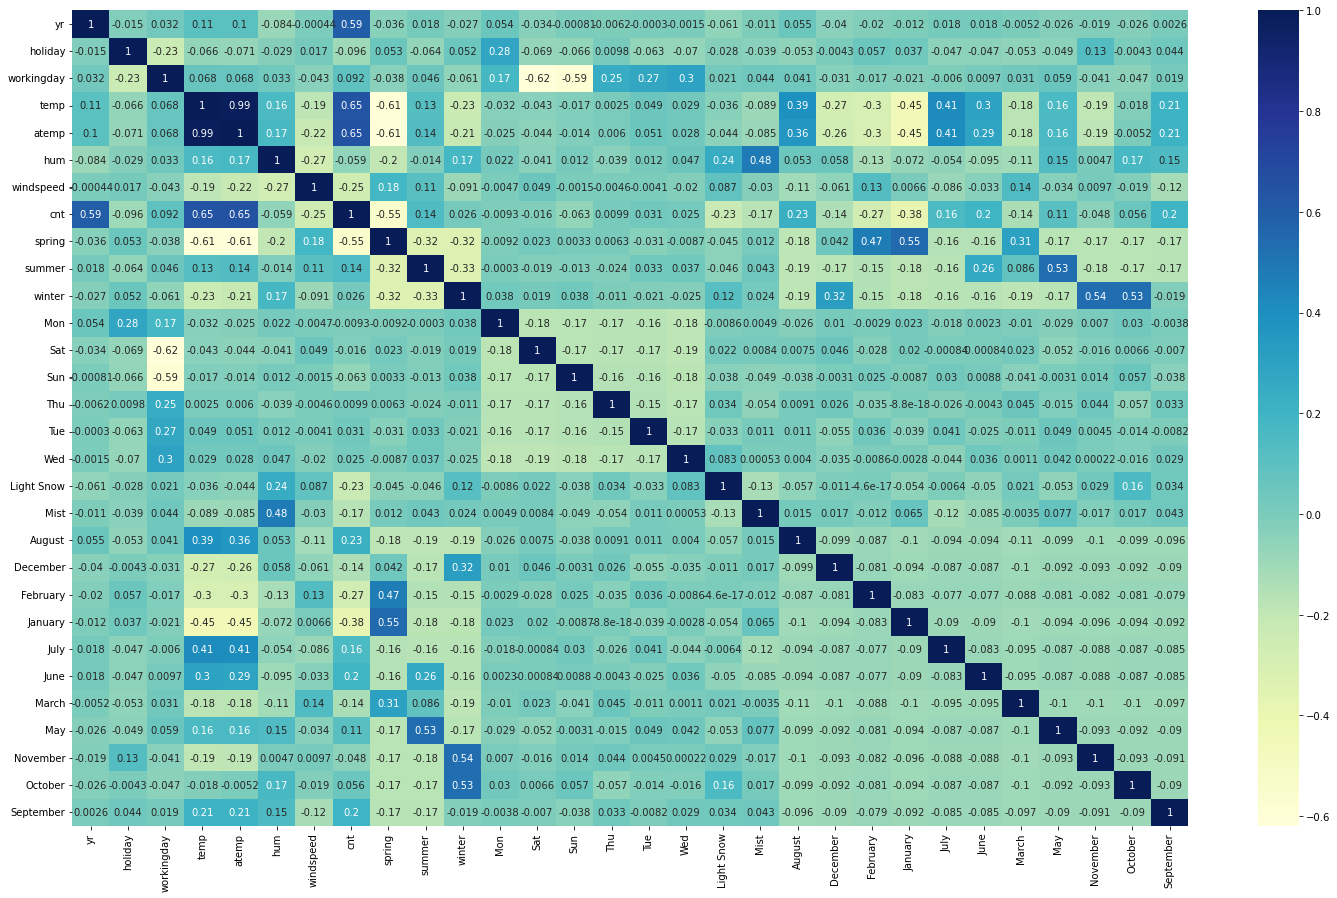

In [450]:
# Plot correlation graph for all train data set
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Observation:
* High positive corelation between cnt.atemp,temp,yr and season
* Negative corelation with windpeed,hum,weathersit and holiday

# Build linear model
* Using LinearRegressionFunction from Scikit learn  (RFE utility)
* RFE - Repeated Feature Elimination 

In [451]:
# X_train , y_train
y_train = df_train.pop("cnt")
X_train = df_train

In [452]:
#Check all independent columns of train data set
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Snow', 'Mist', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [453]:
# Create LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

#Using Repated Feature Elimination (RFE) for data analysis
rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)

In [454]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 4),
 ('Sat', True, 1),
 ('Sun', False, 3),
 ('Thu', False, 6),
 ('Tue', False, 5),
 ('Wed', False, 7),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('August', False, 2),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('March', False, 10),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 8),
 ('September', True, 1)]

In [455]:
# Taking columns which are related to our analysis
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Sat', 'Light Snow', 'Mist', 'December',
       'February', 'January', 'July', 'May', 'November', 'September'],
      dtype='object')

In [456]:
# Creating X_train_ref after RFE
X_train_ref = X_train[col]

# Build model using statsmodel, for detailed stastics

In [457]:
#Observe 5 entires of train data set after RFE
X_train_ref.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Sat,Light Snow,Mist,December,February,January,July,May,November,September
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,1,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,1,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,1,0,0,0,0,0,0,0


 # Model 1

In [458]:
X_train_ref = sm.add_constant(X_train_ref)

lm = sm.OLS(y_train,X_train_ref).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.28e-188
Time:                        20:38:06   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2973      0.039      7.717      0.000       0.222       0.373
yr             0.2318      0.008     29.075      0.000       0.216       0.247
holiday       -0.0490      0.027     -1.816      0.070      -0.102       0.004
workingday     0.0441      0.011      3.849      0.000       0.022       0.067
temp           0.4267      0.134      3.194      0.001       0.164       0.689
atemp          0.0273      0.135      0.202      0.840      -0.238       0.293
hum           -0.1542      0.038     -4.095      0.000      -0.228      -0.080
windspeed     -0.1862      0.026     -7.183      0.000      -0.237      -0.135
spring        -0.0559      0.022     -2.529      0.012      -0.099      -0.012
summer         0.0288      0.017      1.672      0.095      -0.005       0.063
winter         0.0994      0.018      5.477      0.000       0.064       0.135
Sat            0.0545      0.014      3.771      0.000       0.026       0.083
Light Snow    -0.2545      0.026     -9.724      0.000      -0.306      -0.203
Mist          -0.0583      0.010     -5.643      0.000      -0.079      -0.038
December      -0.0488      0.018     -2.692      0.007      -0.084      -0.013
February      -0.0347      0.021     -1.623      0.105      -0.077       0.007
January       -0.0649      0.021     -3.058      0.002      -0.107      -0.023
July          -0.0513      0.018     -2.849      0.005      -0.087      -0.016
May            0.0230      0.017      1.330      0.184      -0.011       0.057
November      -0.0461      0.019     -2.456      0.014      -0.083      -0.009
September      0.0721      0.017      4.322      0.000       0.039       0.105
==============================================================================
Omnibus:                       83.276   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.047
Skew:                          -0.790   Prob(JB):                     1.50e-51
Kurtosis:                       5.919   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X_train_ref.columns

vif["VIF"] = [variance_inflation_factor(X_train_ref.values,i) for i in range(X_train_ref.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,97.29
4,temp,59.59
5,atemp,53.94
8,spring,5.90
10,winter,4.02
9,summer,3.62
16,January,2.38
6,hum,1.97
3,workingday,1.88
15,February,1.87


# Model 2

In [460]:
# We can see large p-value and VIF for atemp drop it
X_train_new = X_train_ref.drop(["atemp"],axis=1)

In [461]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.20e-189
Time:                        20:38:07   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2970      0.038      7.722      0.000       0.221       0.373
yr             0.2318      0.008     29.103      0.000       0.216       0.247
holiday       -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday     0.0441      0.011      3.852      0.000       0.022       0.067
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
Sat            0.0544      0.014      3.774      0.000       0.026       0.083
Light Snow    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Mist          -0.0583      0.010     -5.655      0.000      -0.079      -0.038
December      -0.0488      0.018     -2.692      0.007      -0.084      -0.013
February      -0.0348      0.021     -1.626      0.105      -0.077       0.007
January       -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
November      -0.0461      0.019     -2.456      0.014      -0.083      -0.009
September      0.0723      0.017      4.349      0.000       0.040       0.105
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [462]:
#Calculate VIF

vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,97.18
7,spring,5.79
4,temp,4.88
9,winter,3.88
8,summer,3.49
15,January,2.38
5,hum,1.97
3,workingday,1.88
14,February,1.87
18,November,1.82


# Model 3

In [463]:
# February has high value for p dropping it 
X_train_new = X_train_new.drop(["February"],axis=1)

In [464]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.52e-189
Time:                        20:38:08   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2847      0.038      7.537      0.000       0.211       0.359
yr             0.2314      0.008     29.019      0.000       0.216       0.247
holiday       -0.0514      0.027     -1.907      0.057      -0.104       0.002
workingday     0.0443      0.011      3.862      0.000       0.022       0.067
temp           0.4686      0.037     12.671      0.000       0.396       0.541
hum           -0.1553      0.038     -4.128      0.000      -0.229      -0.081
windspeed     -0.1862      0.025     -7.320      0.000      -0.236      -0.136
spring        -0.0646      0.021     -3.054      0.002      -0.106      -0.023
summer         0.0333      0.017      1.988      0.047       0.000       0.066
winter         0.1019      0.018      5.721      0.000       0.067       0.137
Sat            0.0552      0.014      3.825      0.000       0.027       0.084
Light Snow    -0.2537      0.026     -9.715      0.000      -0.305      -0.202
Mist          -0.0581      0.010     -5.623      0.000      -0.078      -0.038
December      -0.0398      0.017     -2.301      0.022      -0.074      -0.006
January       -0.0464      0.018     -2.597      0.010      -0.082      -0.011
July          -0.0520      0.018     -2.896      0.004      -0.087      -0.017
May            0.0215      0.017      1.245      0.214      -0.012       0.055
November      -0.0412      0.019     -2.223      0.027      -0.078      -0.005
September      0.0738      0.017      4.436      0.000       0.041       0.106
==============================================================================
Omnibus:                       78.179   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.388
Skew:                          -0.745   Prob(JB):                     6.23e-48
Kurtosis:                       5.830   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [465]:
#Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,93.44
7,spring,5.39
4,temp,4.56
9,winter,3.86
8,summer,3.42
5,hum,1.97
3,workingday,1.88
10,Sat,1.79
17,November,1.78
14,January,1.68


# Model 4

In [466]:
# Dropping 'may' because of high p-value
X_train_new = X_train_new.drop(["May"],axis=1)

In [467]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.52e-190
Time:                        20:38:08   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.037      7.433      0.000       0.203       0.348
yr             0.2309      0.008     28.978      0.000       0.215       0.247
holiday       -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday     0.0444      0.011      3.870      0.000       0.022       0.067
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
Sat            0.0548      0.014      3.794      0.000       0.026       0.083
Light Snow    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Mist          -0.0583      0.010     -5.637      0.000      -0.079      -0.038
December      -0.0388      0.017     -2.248      0.025      -0.073      -0.005
January       -0.0455      0.018     -2.548      0.011      -0.081      -0.010
July          -0.0524      0.018     -2.916      0.004      -0.088      -0.017
November      -0.0399      0.019     -2.152      0.032      -0.076      -0.003
September      0.0737      0.017      4.430      0.000       0.041       0.106
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
#Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,89.88
7,spring,5.27
4,temp,4.43
9,winter,3.83
8,summer,2.77
5,hum,1.94
3,workingday,1.88
10,Sat,1.79
16,November,1.77
14,January,1.68


# Model 5

In [469]:
# Dropping 'holiday' because of  p-value >.05
X_train_new = X_train_new.drop(["holiday"],axis=1)

In [470]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.20e-190
Time:                        20:38:09   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.000       0.196       0.342
yr             0.2311      0.008     28.929      0.000       0.215       0.247
workingday     0.0521      0.011      4.826      0.000       0.031       0.073
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
Sat            0.0625      0.014      4.493      0.000       0.035       0.090
Light Snow    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
Mist          -0.0581      0.010     -5.607      0.000      -0.078      -0.038
December      -0.0398      0.017     -2.302      0.022      -0.074      -0.006
January       -0.0465      0.018     -2.596      0.010      -0.082      -0.011
July          -0.0514      0.018     -2.854      0.004      -0.087      -0.016
November      -0.0441      0.018     -2.390      0.017      -0.080      -0.008
September      0.0714      0.017      4.289      0.000       0.039       0.104
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [471]:
#Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,89.13
6,spring,5.26
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.94
15,November,1.75
13,January,1.68
2,workingday,1.66
9,Sat,1.65


# Model 6

In [472]:
# Dropping 'spring' because of  VIF >5
X_train_new = X_train_new.drop(["spring"],axis=1)

In [473]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.82e-190
Time:                        20:38:10   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2037      0.030      6.784      0.000       0.145       0.263
yr             0.2297      0.008     28.578      0.000       0.214       0.245
workingday     0.0528      0.011      4.857      0.000       0.031       0.074
temp           0.5492      0.027     20.533      0.000       0.497       0.602
hum           -0.1600      0.038     -4.265      0.000      -0.234      -0.086
windspeed     -0.1969      0.026     -7.713      0.000      -0.247      -0.147
summer         0.0733      0.011      6.665      0.000       0.052       0.095
winter         0.1395      0.013     10.524      0.000       0.113       0.166
Sat            0.0632      0.014      4.509      0.000       0.036       0.091
Light Snow    -0.2488      0.026     -9.468      0.000      -0.300      -0.197
Mist          -0.0552      0.010     -5.307      0.000      -0.076      -0.035
December      -0.0338      0.017     -1.952      0.051      -0.068       0.000
January       -0.0504      0.018     -2.801      0.005      -0.086      -0.015
July          -0.0411      0.018     -2.308      0.021      -0.076      -0.006
November      -0.0343      0.018     -1.877      0.061      -0.070       0.002
September      0.0864      0.016      5.402      0.000       0.055       0.118
==============================================================================
Omnibus:                       73.135   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.330
Skew:                          -0.749   Prob(JB):                     1.40e-38
Kurtosis:                       5.442   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [474]:
#Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,57.71
3,temp,2.33
7,winter,2.09
4,hum,1.91
14,November,1.69
12,January,1.67
2,workingday,1.66
8,Sat,1.65
10,Mist,1.56
11,December,1.48


# Model 7

In [475]:
# Dropping 'November' because of p-value>.05
X_train_new = X_train_new.drop(["November"],axis=1)

In [476]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.76e-190
Time:                        20:38:11   Log-Likelihood:                 514.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     495   BIC:                            -936.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1959      0.030      6.571      0.000       0.137       0.254
yr             0.2297      0.008     28.507      0.000       0.214       0.246
workingday     0.0531      0.011      4.876      0.000       0.032       0.075
temp           0.5582      0.026     21.164      0.000       0.506       0.610
hum           -0.1592      0.038     -4.233      0.000      -0.233      -0.085
windspeed     -0.1969      0.026     -7.695      0.000      -0.247      -0.147
summer         0.0747      0.011      6.790      0.000       0.053       0.096
winter         0.1268      0.011     11.089      0.000       0.104       0.149
Sat            0.0640      0.014      4.551      0.000       0.036       0.092
Light Snow    -0.2457      0.026     -9.344      0.000      -0.297      -0.194
Mist          -0.0547      0.010     -5.246      0.000      -0.075      -0.034
December      -0.0214      0.016     -1.332      0.183      -0.053       0.010
January       -0.0456      0.018     -2.553      0.011      -0.081      -0.011
July          -0.0421      0.018     -2.358      0.019      -0.077      -0.007
September      0.0894      0.016      5.604      0.000       0.058       0.121
==============================================================================
Omnibus:                       70.968   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.157
Skew:                          -0.732   Prob(JB):                     5.04e-37
Kurtosis:                       5.392   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
#Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,56.61
3,temp,2.26
4,hum,1.91
2,workingday,1.66
8,Sat,1.65
12,January,1.63
10,Mist,1.56
7,winter,1.55
6,summer,1.43
13,July,1.43


# Model 8

In [478]:
# Dropping 'December' because of p-value>.05
X_train_new = X_train_new.drop(["December"],axis=1)

In [479]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.53e-191
Time:                        20:38:11   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1907      0.030      6.447      0.000       0.133       0.249
yr             0.2296      0.008     28.473      0.000       0.214       0.245
workingday     0.0526      0.011      4.824      0.000       0.031       0.074
temp           0.5684      0.025     22.506      0.000       0.519       0.618
hum           -0.1643      0.037     -4.387      0.000      -0.238      -0.091
windspeed     -0.1943      0.026     -7.609      0.000      -0.244      -0.144
summer         0.0765      0.011      6.997      0.000       0.055       0.098
winter         0.1251      0.011     11.000      0.000       0.103       0.147
Sat            0.0629      0.014      4.476      0.000       0.035       0.090
Light Snow    -0.2425      0.026     -9.253      0.000      -0.294      -0.191
Mist          -0.0538      0.010     -5.172      0.000      -0.074      -0.033
January       -0.0401      0.017     -2.306      0.022      -0.074      -0.006
July          -0.0429      0.018     -2.402      0.017      -0.078      -0.008
September      0.0909      0.016      5.715      0.000       0.060       0.122
==============================================================================
Omnibus:                       67.331   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.535
Skew:                          -0.705   Prob(JB):                     2.77e-34
Kurtosis:                       5.298   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [480]:
#Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,55.65
3,temp,2.07
4,hum,1.89
2,workingday,1.65
8,Sat,1.64
10,Mist,1.56
11,January,1.55
7,winter,1.53
12,July,1.43
6,summer,1.41


# Model 9

In [481]:
# Dropping 'December' because of p-value>.05
X_train_new = X_train_new.drop(["January"],axis=1)

In [482]:
#Creating model
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.14e-191
Time:                        20:38:12   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.028      6.014      0.000       0.115       0.227
yr             0.2286      0.008     28.267      0.000       0.213       0.244
workingday     0.0524      0.011      4.791      0.000       0.031       0.074
temp           0.5960      0.022     26.667      0.000       0.552       0.640
hum           -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed     -0.1888      0.026     -7.393      0.000      -0.239      -0.139
summer         0.0827      0.011      7.770      0.000       0.062       0.104
winter         0.1355      0.010     12.930      0.000       0.115       0.156
Sat            0.0625      0.014      4.429      0.000       0.035       0.090
Light Snow    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
Mist          -0.0536      0.010     -5.129      0.000      -0.074      -0.033
July          -0.0439      0.018     -2.450      0.015      -0.079      -0.009
September      0.0928      0.016      5.816      0.000       0.061       0.124
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [483]:
#Calculate VIF
vif = pd.DataFrame()
vif["features"] = X_train_new.columns

vif["VIF"] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
8,Sat,1.64
3,temp,1.60
10,Mist,1.56
11,July,1.43
6,summer,1.33
7,winter,1.29
9,Light Snow,1.24


# Final model:
* This model looks good:
    * Very low multicollineriaty VIF<5.    No multicollinearity between predictors
    * p-value<0.05

#  Hypothesis Testing

In [484]:
#Check all the params of linear model
lm.params

const         0.171244
yr            0.228581
workingday    0.052441
temp          0.595988
hum          -0.170916
windspeed    -0.188772
summer        0.082670
winter        0.135504
Sat           0.062458
Light Snow   -0.239137
Mist         -0.053623
July         -0.043937
September     0.092832
dtype: float64

# H0
* Null Hypothesis states that coefficients =0

# H1 
* Alternate hypothesis state that at least one coefficient !=0

** From above coefficients we can reject the Null Hypothesis, as non of the coefficient is equal to zero

# In model 9 
* F-statistic: 222.7 very high
* Prob (F-statistic): 4.14e-191 close to zero

** SO model is good and more significant for analysis

# Equation from model 9
* cnt = 0.171244 + (0.228581 x <b>yr</b>) + (0.052441 x <b>workingday</b>) + (0.595988 x <b>temp</b>) - (0.170916 x <b>hum</b>) - (0.188772 x <b>windspeed</b>) + (0.082670 x <b>summer</b>) + (0.135504 x <b>winter</b>) + (0.062458 x <b>sat</b>) - (0.239137 x <b>Light Snow</b>) - (0.053623 x <b>Mist</b>) - (0.043937 x <b>July</b>) + (0.092832 x <b>September</b>)
      

# Coefficient Interpratation: 

<b>yr : (0.228581)</b>  A unit increase in yr , increase the bike hire by 0.228581 <br/>
<b>workingday : (0.052441)</b>  A unit increase in workingday , increase the bike hire by 0.052441 <br/>
<b>temp : (0.595988)</b>  A unit increase in temp , increase the bike hire by 0.595988 <br/>
<b>hum : (-0.170916)</b>  A unit increase in hum , decrease the bike hire by 0.170916 <br/>
<b>windspeed : (-0.188772)</b>  A unit increase in windspeed , decrease the bike hire by 0.188772 <br/>
<b>summer : (0.082670)</b>  A unit increase in summer , increase the bike hire by 0.082670 <br/>
<b>winter : (0.135504)</b>  A unit increase in winter , increase the bike hire by 0.135504 <br/>
<b>sat : (0.062458)</b>  A unit increase in sat, increase the bike hire by 0.062458 <br/>
<b>Light Snow : (-0.239137)</b>  A unit increase in Light Snow , decrease the bike hire by 0.239137<br/>
<b>Mist : (-0.053623)</b>  A unit increase in Mist , decrease the bike hire by 0.053623 <br/>
<b>July : (-0.043937)</b>  A unit increase in July , decrease the bike hire by 0.043937 <br/>
<b>September : (0.092832)</b>  A unit increase in September , increase the bike hire by 0.092832 <br/>




# Residual Analysis of train data

Text(0.5, 0, 'Errors')

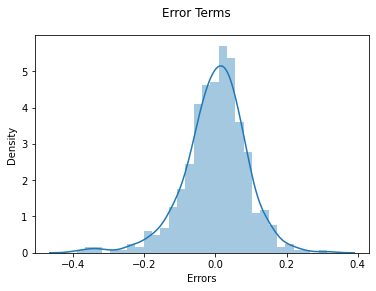

In [485]:
#Observing the residuals of our final model
X_train_lm = X_train_new
y_train_pred = lm.predict(X_train_lm)
sns.distplot(y_train-y_train_pred)
plt.suptitle("Error Terms")
plt.xlabel("Errors",fontsize=10)

In [486]:
residuals = y_train-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

#Observe that mean of residuals is close to zero 

Mean of Residuals 7.460807570875623e-16


# Check for Homoscedasticity
* Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

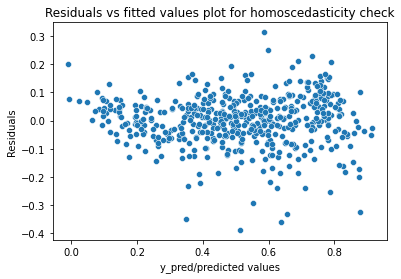

In [487]:
#Checking for homoscedasticity
p=sns.scatterplot(y_train_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Observation:
* From above histogram we can say that errors are normally distributed with mean to 0.
* Valid model and we can rely on this

# Making predictions

In [488]:
# will scale only numeric values
numeric = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# use transform only for scaling test data
df_test[numeric] = scaler.transform(df_test[numeric])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [489]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [490]:
# Dividing into X_test and y_test

y_test = df_test.pop("cnt")
X_test = df_test

In [491]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Sat', 'Light Snow', 'Mist', 'July', 'September'],
      dtype='object')

In [492]:
#Dropping const variable, as it's derived one
X_train_new=X_train_new.drop("const",axis=1)

In [493]:
X_test_new = X_test[X_train_new.columns]

In [494]:
# Adding constant to test data
X_test_lm = sm.add_constant(X_test_new)

In [495]:
#Making predictions using model
y_pred = lm.predict(X_test_lm)


# MODEL EVALUATION

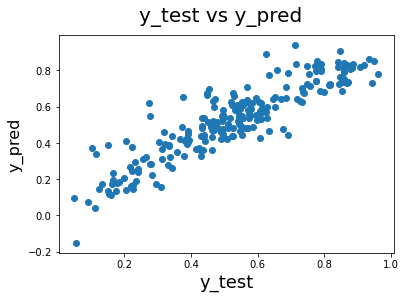

In [496]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [497]:
# R^2 for Test model
r2_score(y_test,y_pred)

0.8069504602915928

In [498]:
#Checking the shape of test data set
print(X_test.shape[0])
print(X_test.shape[1])

220
29


In [499]:
# Adjusted R^2 value for test
#Adjustd R^2 = 1- [(1-R^2)*(N-1) ]/(N-P-1)
# R^2 = 0.8069
#N - number of samples = 220
#P - Number of features = 29
adjusted_RSquare =  1 - ((1-0.8069)*(220-1))/(220-29-1)
print(adjusted_RSquare)

0.777426842105263


# Results:
*  Train R^2 = 0.839
*  Train Adjusted R^2 = 0.843
*  Test R^2 = 0.8069504602915928
*  Test Adjusted R^2 = 0.777426842105263
* We can say that model is good 

Text(0, 0.5, 'Views')

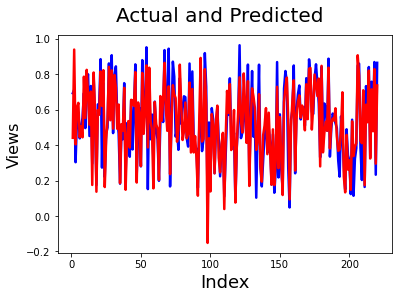

In [500]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)     